<a href="https://colab.research.google.com/github/JunetzMasihBelajar/2025_AI_TI1B/blob/main/Jobsheet9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 9 : Supervise Learning SVM dan NAÏVE BAYES

## Percobaan 1 : Implementasi Support Vector Machine (SVM)

In [9]:
import pandas as pd

# Membaca file diabetes.csv
df = pd.read_csv('diabetes.csv')

In [10]:
# melihat informasi dataset pada 5 baris pertama
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# menampilkan info dari tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [13]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [15]:
# Menampilkan skor akurasi prediksi

clf.score(X_test, y_test)

0.7440944881889764

### Tugas Praktikum 1

Pada praktikum percobaan 1 yaitu implementasi algoritma SVM  anda telah mendapatkan nilai akurasi dari model. Carilah parameter pada algoritma SVM sampai anda mendapatkan nilai akurasi terbaik dari kedua algoritma tersebut.


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scaling sangat disarankan untuk SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 1],
    'kernel': ['rbf', 'linear']
}

# GridSearch dengan optimasi performa
grid = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Jalankan GridSearch
grid.fit(X_train_scaled, y_train)

# Tampilkan hasil
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Uji akurasi pada test data
y_pred = grid.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV Accuracy: 0.7781838949171902
Test Accuracy: 0.7519685039370079


## Percobaan 2 : Implementasi Support Vector Regression (SVR)

In [24]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [26]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [27]:
import numpy as np

# Memisahkan atribut dan label
X = data['YearsExperience'].values
y = data['Salary'].values

# Mengubah bentuk atribut menjadi (n_samples, 1)
X = X[:, np.newaxis]

In [28]:
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model  = SVR(C=1000, gamma=0.05, kernel='rbf')

# melatih model dengan fungsi fit
model.fit(X,y)

SVR(C=1000, gamma=0.05)

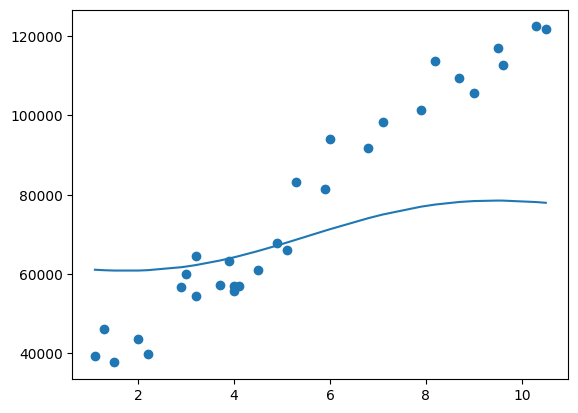

In [29]:
import matplotlib.pyplot as plt

# memvisualisasikan model
plt.scatter(X, y)
plt.plot(X, model.predict(X))

### Tugas Praktikum 1
Pada praktikum percobaan 2 yaitu implementasi algoritma SVR anda telah mendapatkan nilai akurasi dari model. Carilah parameter pada algoritma SVR sampai anda mendapatkan nilai akurasi terbaik dari kedua algoritma tersebut.

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'C': 1000, 'epsilon': 0.5, 'gamma': 0.001, 'kernel': 'linear'}
R² Score on entire data: 0.96


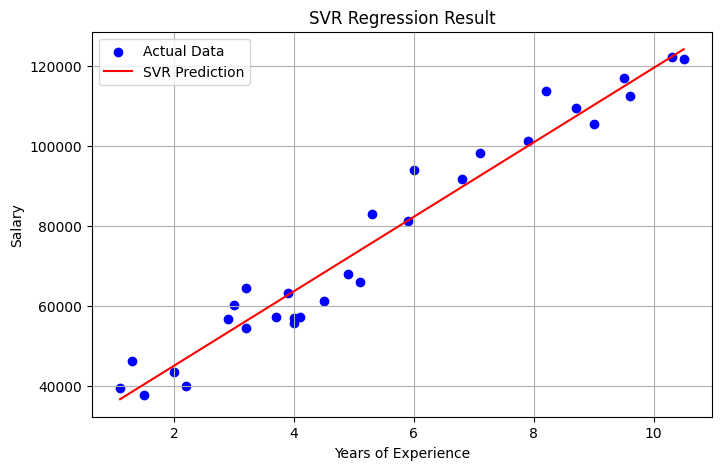

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('Salary_Data.csv')

# Pisahkan atribut dan label
X = data['YearsExperience'].values[:, np.newaxis]
y = data['Salary'].values

# GridSearch untuk SVR
param_grid = {
    'C': [1, 100, 1000],
    'gamma': [0.001, 0.01, 0.1],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVR(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X, y)

# Cetak parameter terbaik
print("Best Parameters:", grid.best_params_)

# Evaluasi model terbaik
best_model = grid.best_estimator_
y_pred = best_model.predict(X)
r2 = r2_score(y, y_pred)

print("R² Score on entire data: {:.2f}".format(r2))

# Visualisasi
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='SVR Prediction')
plt.title('SVR Regression Result')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


## Percobaan 3: Implementasi Naïve Bayes

In [101]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# load dataset
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')
dataset.head()

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


In [103]:
X = dataset.iloc[:,2:-1]
y = dataset.iloc[:, -1]

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [105]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [106]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [108]:
# prediksi X_test
y_pred = classifier.predict(X_test)

In [109]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [110]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [111]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 87.5%
Confussion Matrix : 
[[52  4]
 [ 6 18]]


<ipython-input-112-2392959823>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


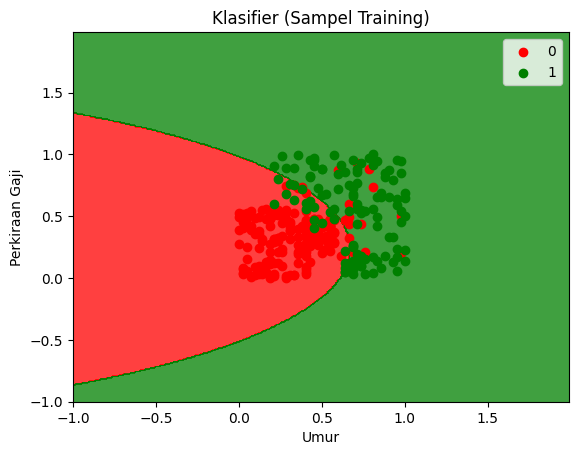

In [112]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

<ipython-input-113-341338830>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


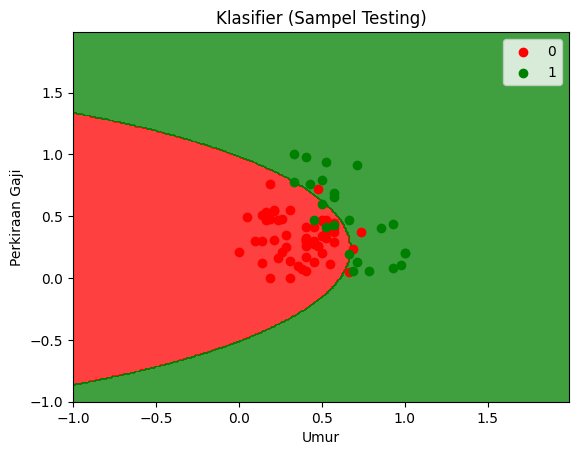

In [113]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Testing)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

### Tugas Praktikum 2
 Pada praktikum percobaan 3 yaitu implementasi algoritma Naïve Bayes anda telah mendapatkan nilai akurasi yang cukup tinggi, namun hasil akurasi tersebut masih dapat ditinggkatkan menggunakan hyperparameter tunning. Carilah parameter pada algoritma Naïve Bayes sampai anda mendapatkan nilai akurasi yang lebih tinggi daripada nilai akurasi pada percobaan.

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load dataset
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

# Normalisasi
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Pencarian var_smoothing terbaik
smoothing_vals = np.logspace(-9, -1, 10)
best_acc = 0
best_model = None

for vs in smoothing_vals:
    model = GaussianNB(var_smoothing=vs)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    if acc > best_acc:
        best_acc = acc
        best_model = model
        best_vs = vs

print("Akurasi terbaik Naïve Bayes:", best_acc)
print("Parameter var_smoothing terbaik:", best_vs)

Akurasi terbaik Naïve Bayes: 0.8875
Parameter var_smoothing terbaik: 0.1
